# Estimate the Blockage CDF

Initially used the following assumption -
- We want this to be a distribution where it is 90% likely for small obstruction. For the last 10% (90+), need the amount of blockage to increase significantly.
- Ended up with a 90th percentile blockage of about 1.26 m
Now are doing an ensemble with no blockage. As a result, can make blockage more likely.
- Goal is a 50th percentile blockage of about 1.00 m.

## Imports and Parameters

In [1]:
%matplotlib inline

In [2]:
import scipy.stats as sstats
from IPython.display import display, HTML
import os
import datetime as dt
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import shapely

In [3]:
probs = np.linspace( 0.01, 1.00, 100 )

In [4]:
probs

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

## Generalized Extreme Value

In [5]:
GEV_01 = sstats.genextreme( -0.1, loc=0, scale=1.0 )
GEV_02 = sstats.genextreme( -1.0, loc=0, scale=1.0 )
GEV_03 = sstats.genextreme( 0.1, loc=0, scale=1.0 )
GEV_04 = sstats.genextreme( 1.0, loc=0, scale=1.0 )

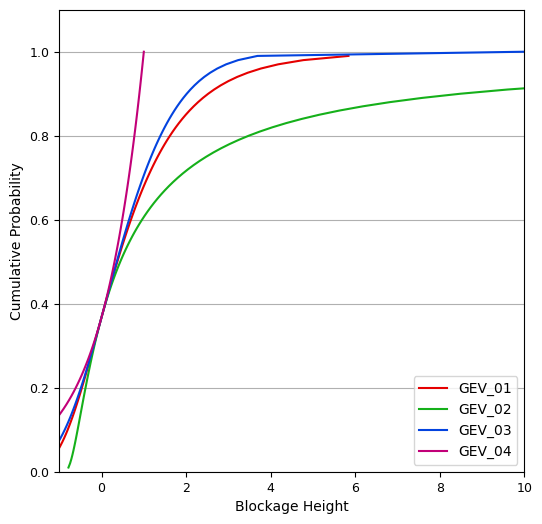

In [6]:
Fig1 = plt.figure()
Fig1.set_size_inches(6.0, 6.0)
ax11 = Fig1.add_subplot(1,1,1)
g1, = ax11.plot( GEV_01.ppf(probs), probs, linestyle='-', linewidth=1.5, color='xkcd:red',
                 label="GEV_01")
g2, = ax11.plot( GEV_02.ppf(probs), probs, linestyle='-', linewidth=1.5, color='xkcd:green',
                 label="GEV_02")
g3, = ax11.plot( GEV_03.ppf(probs), probs, linestyle='-', linewidth=1.5, color='xkcd:blue',
                 label="GEV_03")
g4, = ax11.plot( GEV_04.ppf(probs), probs, linestyle='-', linewidth=1.5, color='xkcd:magenta',
                 label="GEV_04")
ax11.set_ylabel( "Cumulative Probability", fontsize=10)
ax11.set_xlabel( "Blockage Height", fontsize=10)
ax11.grid( visible=True, which='major', axis='y' )
ax11.set_xlim( ( -1.0, 10.0) )
ax11.set_ylim( ( 0.0, 1.1 ) )
ax11.legend( loc="lower right" )
ax11.tick_params(axis='both', which='major', labelsize=9)
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [7]:
GEV_01.ppf( [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99] )

array([0.37331232, 0.69480161, 1.08594552, 1.6182727 , 2.52368718,
       3.45841577, 5.84097624])

In [8]:
GEV_01.cdf( 5.0 )

0.9828079689867767

In [9]:
GEV_05 = sstats.genextreme( -0.1, loc=0, scale=0.1 )
GEV_06 = sstats.genextreme( -0.1, loc=0, scale=0.5 )
GEV_07 = sstats.genextreme( -0.1, loc=0, scale=5.0 )

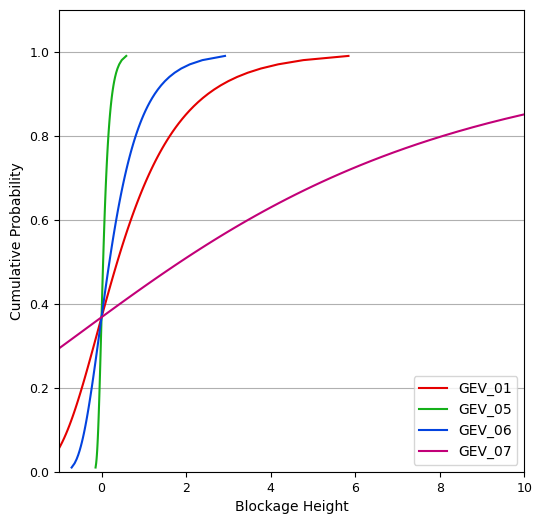

In [10]:
Fig1 = plt.figure()
Fig1.set_size_inches(6.0, 6.0)
ax11 = Fig1.add_subplot(1,1,1)
g1, = ax11.plot( GEV_01.ppf(probs), probs, linestyle='-', linewidth=1.5, color='xkcd:red',
                 label="GEV_01")
g5, = ax11.plot( GEV_05.ppf(probs), probs, linestyle='-', linewidth=1.5, color='xkcd:green',
                 label="GEV_05")
g6, = ax11.plot( GEV_06.ppf(probs), probs, linestyle='-', linewidth=1.5, color='xkcd:blue',
                 label="GEV_06")
g7, = ax11.plot( GEV_07.ppf(probs), probs, linestyle='-', linewidth=1.5, color='xkcd:magenta',
                 label="GEV_07")
ax11.set_ylabel( "Cumulative Probability", fontsize=10)
ax11.set_xlabel( "Blockage Height", fontsize=10)
ax11.grid( visible=True, which='major', axis='y' )
ax11.set_xlim( ( -1.0, 10.0) )
ax11.set_ylim( ( 0.0, 1.1 ) )
ax11.legend( loc="lower right" )
ax11.tick_params(axis='both', which='major', labelsize=9)
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [11]:
GEV_05.ppf( [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99] )

array([0.03733123, 0.06948016, 0.10859455, 0.16182727, 0.25236872,
       0.34584158, 0.58409762])

In [12]:
GEV_06.ppf( [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99] )

array([0.18665616, 0.3474008 , 0.54297276, 0.80913635, 1.26184359,
       1.72920788, 2.92048812])

In [13]:
GEV_08 = sstats.genextreme( -0.1, loc=0, scale=0.65 )
GEV_09 = sstats.genextreme( -0.1, loc=0, scale=0.85 )

In [14]:
OutPNG = os.path.normpath( r'C:\Users\nicholas.martin\Documents\Flood_Risk_Model\Partial_Blockage_Devel\Planning\Dist_Comp.png' )

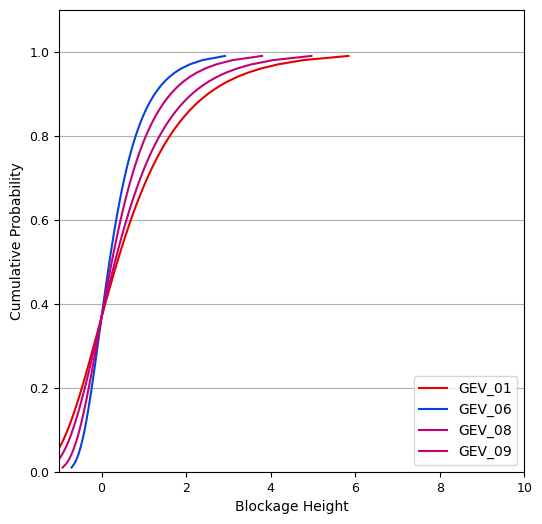

In [16]:
Fig1 = plt.figure()
Fig1.set_size_inches(6.0, 6.0)
ax11 = Fig1.add_subplot(1,1,1)
g1, = ax11.plot( GEV_01.ppf(probs), probs, linestyle='-', linewidth=1.5, color='xkcd:red',
                 label="GEV_01")
g6, = ax11.plot( GEV_06.ppf(probs), probs, linestyle='-', linewidth=1.5, color='xkcd:blue',
                 label="GEV_06")
g8, = ax11.plot( GEV_08.ppf(probs), probs, linestyle='-', linewidth=1.5, color='xkcd:magenta',
                 label="GEV_08")
g9, = ax11.plot( GEV_09.ppf(probs), probs, linestyle='-', linewidth=1.5, color='xkcd:magenta',
                 label="GEV_09")
ax11.set_ylabel( "Cumulative Probability", fontsize=10)
ax11.set_xlabel( "Blockage Height", fontsize=10)
ax11.grid( visible=True, which='major', axis='y' )
ax11.set_xlim( ( -1.0, 10.0) )
ax11.set_ylim( ( 0.0, 1.1 ) )
ax11.legend( loc="lower right" )
ax11.tick_params(axis='both', which='major', labelsize=9)
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
#Fig1.savefig( OutPNG, dpi=600 )

In [17]:
GEV_08.ppf( [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99] )

array([0.24265301, 0.45162104, 0.70586459, 1.05187726, 1.64039667,
       2.24797025, 3.79663455])

In [18]:
GEV_09.ppf( [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99] )

array([0.31731547, 0.59058137, 0.92305369, 1.3755318 , 2.14513411,
       2.9396534 , 4.9648298 ])

For our original want to use - GEV_06!!!

## More Likely Blockage

Look for our new GEV with 33rd percentile of about 1.0 m. Have GEV_01 through GEV_09 already defined. Look at these.

In [19]:
GEV_01.ppf( [0.25, 0.30, 0.333, 0.35, 0.40] )

array([-0.32135737, -0.18391451, -0.09450868, -0.04850274,  0.08780481])

In [20]:
GEV_02.ppf( [0.25, 0.30, 0.333, 0.35, 0.40] )

array([-0.27865248, -0.16941645, -0.09058897, -0.04745768,  0.09135667])

In [21]:
GEV_03.ppf( [0.25, 0.30, 0.333, 0.35, 0.40] )

array([-0.33202732, -0.18736033, -0.09541039, -0.04873914,  0.08704056])

In [22]:
GEV_04.ppf( [0.25, 0.30, 0.333, 0.35, 0.40] )

array([-0.38629436, -0.2039728 , -0.09961279, -0.04982212,  0.08370927])

In [23]:
GEV_05.ppf( [0.25, 0.30, 0.333, 0.35, 0.40] )

array([-0.03213574, -0.01839145, -0.00945087, -0.00485027,  0.00878048])

In [24]:
GEV_06.ppf( [0.25, 0.30, 0.333, 0.35, 0.40] )

array([-0.16067869, -0.09195725, -0.04725434, -0.02425137,  0.04390241])

In [25]:
GEV_07.ppf( [0.25, 0.30, 0.333, 0.35, 0.40] )

array([-1.60678686, -0.91957253, -0.4725434 , -0.24251369,  0.43902407])

In [26]:
GEV_08.ppf( [0.25, 0.30, 0.333, 0.35, 0.40] )

array([-0.20888229, -0.11954443, -0.06143064, -0.03152678,  0.05707313])

In [27]:
GEV_10 = sstats.genextreme( -1.0, loc=0.5, scale=2.0 )

In [35]:
GEV_10.ppf( [0.25, 0.333, 0.50, 0.75] )

array([-0.05730496,  0.31882206,  1.38539008,  5.45211899])

In [29]:
GEV_11 = sstats.genextreme( -1.0, loc=1.0, scale=1.0 )

In [34]:
GEV_11.ppf( [0.25, 0.333, 0.50, 0.75] )

array([0.72134752, 0.90941103, 1.44269504, 3.4760595 ])

In [31]:
GEV_12 = sstats.genextreme( 0.1, loc=1.0, scale=1.0 )

In [33]:
GEV_12.ppf( [0.25, 0.333, 0.50, 0.75] )

array([0.66797268, 0.90458961, 1.35987765, 2.1714114 ])

In [37]:
GEV_13 = sstats.genextreme( -1.0, loc=1.0, scale=2.0 )

In [38]:
GEV_13.ppf( [0.25, 0.333, 0.50, 0.75] )

array([0.44269504, 0.81882206, 1.88539008, 5.95211899])

In [40]:
GEV_14 = sstats.genextreme( -1.0, loc=1.5, scale=1.0 )

In [41]:
GEV_14.ppf( [0.25, 0.333, 0.50, 0.75] )

array([1.22134752, 1.40941103, 1.94269504, 3.9760595 ])

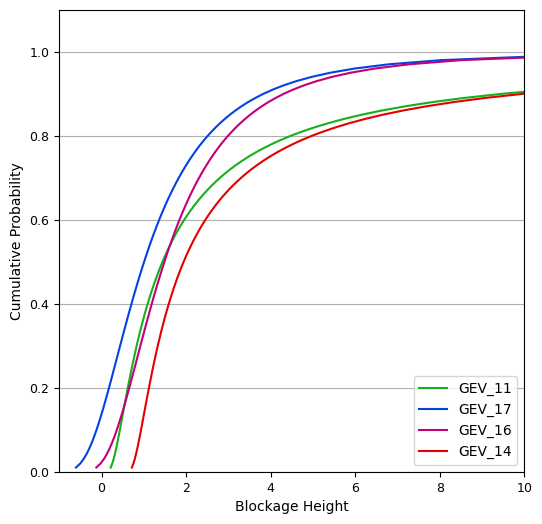

In [65]:
Fig1 = plt.figure()
Fig1.set_size_inches(6.0, 6.0)
ax11 = Fig1.add_subplot(1,1,1)
g11, = ax11.plot( GEV_11.ppf(probs), probs, linestyle='-', linewidth=1.5, color='xkcd:green',
                 label="GEV_11")
g17, = ax11.plot( GEV_17.ppf(probs), probs, linestyle='-', linewidth=1.5, color='xkcd:blue',
                 label="GEV_17")
g16, = ax11.plot( GEV_16.ppf(probs), probs, linestyle='-', linewidth=1.5, color='xkcd:magenta',
                 label="GEV_16")
g14, = ax11.plot( GEV_14.ppf(probs), probs, linestyle='-', linewidth=1.5, color='xkcd:red',
                 label="GEV_14")
ax11.set_ylabel( "Cumulative Probability", fontsize=10)
ax11.set_xlabel( "Blockage Height", fontsize=10)
ax11.grid( visible=True, which='major', axis='y' )
ax11.set_xlim( ( -1.0, 10.0) )
ax11.set_ylim( ( 0.0, 1.1 ) )
ax11.legend( loc="lower right" )
ax11.tick_params(axis='both', which='major', labelsize=9)
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )

In [45]:
GEV_15 = sstats.genextreme( -1.0, loc=1.1, scale=1.0 )

In [48]:
GEV_15.ppf( [0.25, 0.333, 0.50, 0.75, 0.90, 0.95, 0.99] )

array([ 0.82134752,  1.00941103,  1.54269504,  3.5760595 ,  9.59122158,
       19.59572575, 99.59916247])

In [51]:
GEV_16 = sstats.genextreme( -0.3, loc=1.1, scale=1.0 )

In [52]:
GEV_16.ppf( [0.25, 0.333, 0.50, 0.75, 0.90, 0.95, 0.99] )

array([ 0.78885906,  1.0063817 ,  1.48742195,  2.61067527,  4.31416474,
        5.89236261, 11.01693193])

In [54]:
GEV_06.ppf( [0.25, 0.333, 0.50, 0.75, 0.90, 0.95, 0.99] )

array([-0.16067869, -0.04725434,  0.18665616,  0.6634194 ,  1.26184359,
        1.72920788,  2.92048812])

In [63]:
GEV_17 = sstats.genextreme( -0.3, loc=0.62, scale=1.0 )

In [64]:
GEV_17.ppf( [0.25, 0.333, 0.50, 0.75, 0.90, 0.95, 0.99] )

array([ 0.30885906,  0.5263817 ,  1.00742195,  2.13067527,  3.83416474,
        5.41236261, 10.53693193])

Use GEV_17 for new obstruction representation!!!